# Pandas TA ([pandas_ta](https://github.com/twopirllc/pandas-ta)) Strategies for Custom Technical Analysis

## Topics
- What is a Pandas TA Strategy?
    - Builtin Strategies: __AllStrategy__ and __CommonStrategy__
    - Creating Strategies
- Watchlist Class
    - Strategy Management and Execution
    - **NOTE:** The **watchlist** module is independent of Pandas TA. To easily use it, copy it from your local pandas_ta installation directory into your project directory.
- Indicator Composition/Chaining for more Complex Strategies
    - Comprehensive Example: _MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns_

In [1]:
%matplotlib inline
import datetime as dt

import pandas as pd
import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api

from watchlist import Watchlist # Is this failing? If so, copy it locally. See above.

print(f"\nPandas TA v{ta.version}\nTo install the Latest Version:\n$ pip install -U git+https://github.com/twopirllc/pandas-ta\n")
%pylab inline


Pandas TA v0.2.42b0
To install the Latest Version:
$ pip install -U git+https://github.com/twopirllc/pandas-ta

Populating the interactive namespace from numpy and matplotlib


# What is a Pandas TA Strategy?
A _Strategy_ is a simple way to name and group your favorite TA indicators. Technically, a _Strategy_ is a simple Data Class to contain list of indicators and their parameters. __Note__: _Strategy_ is experimental and subject to change. Pandas TA comes with two basic Strategies: __AllStrategy__ and __CommonStrategy__.

## Strategy Requirements:
- _name_: Some short memorable string.  _Note_: Case-insensitive "All" is reserved.
- _ta_: A list of dicts containing keyword arguments to identify the indicator and the indicator's arguments

## Optional Requirements:
- _description_: A more detailed description of what the Strategy tries to capture. Default: None
- _created_: At datetime string of when it was created. Default: Automatically generated.

### Things to note:
- A Strategy will __fail__ when consumed by Pandas TA if there is no {"kind": "indicator name"} attribute.

# Builtin Examples

### All

In [2]:
AllStrategy = ta.AllStrategy
print("name =", AllStrategy.name)
print("description =", AllStrategy.description)
print("created =", AllStrategy.created)
print("ta =", AllStrategy.ta)

name = All
description = All the indicators with their default settings. Pandas TA default.
created = 02/18/2021, 12:39:47
ta = None


### Common

In [3]:
CommonStrategy = ta.CommonStrategy
print("name =", CommonStrategy.name)
print("description =", CommonStrategy.description)
print("created =", CommonStrategy.created)
print("ta =", CommonStrategy.ta)

name = Common Price and Volume SMAs
description = Common Price SMAs: 10, 20, 50, 200 and Volume SMA: 20.
created = 02/18/2021, 12:39:47
ta = [{'kind': 'sma', 'length': 10}, {'kind': 'sma', 'length': 20}, {'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOL'}]


# Creating Strategies

### Simple Strategy A

In [4]:
custom_a = ta.Strategy(name="A", ta=[{"kind": "sma", "length": 50}, {"kind": "sma", "length": 200}])
custom_a

Strategy(name='A', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}], description='TA Description', created='02/18/2021, 12:39:47')

### Simple Strategy B

In [5]:
custom_b = ta.Strategy(name="B", ta=[{"kind": "ema", "length": 8}, {"kind": "ema", "length": 21}, {"kind": "log_return", "cumulative": True}, {"kind": "rsi"}, {"kind": "supertrend"}])
custom_b

Strategy(name='B', ta=[{'kind': 'ema', 'length': 8}, {'kind': 'ema', 'length': 21}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'rsi'}, {'kind': 'supertrend'}], description='TA Description', created='02/18/2021, 12:39:47')

### Bad Strategy. (Misspelled Indicator)

In [6]:
# Misspelled indicator, will fail later when ran with Pandas TA
custom_run_failure = ta.Strategy(name="Runtime Failure", ta=[{"kind": "percet_return"}])
custom_run_failure

Strategy(name='Runtime Failure', ta=[{'kind': 'percet_return'}], description='TA Description', created='02/18/2021, 12:39:47')

# Strategy Management and Execution with _Watchlist_

### Initialize AlphaVantage Data Source

In [7]:
AV = AlphaVantage(
    api_key="YOUR API KEY", premium=False,
    output_size='full', clean=True,
    export_path=".", export=True
)
AV

AlphaVantage(
  end_point:str = https://www.alphavantage.co/query,
  api_key:str = YOUR API KEY,
  export:bool = True,
  export_path:str = .,
  output_size:str = full,
  output:str = csv,
  datatype:str = json,
  clean:bool = True,
  proxy:dict = {}
)

### Create Watchlist and set it's 'ds' to AlphaVantage

In [8]:
data_source = "av" # Default
# data_source = "yahoo"
watch = Watchlist(["SPY", "IWM"], ds_name=data_source, timed=False)

#### Info about the Watchlist. Note, the default Strategy is "All"

In [9]:
watch

Watch(name='Watch: SPY, IWM', ds_name='av', tickers[2]='SPY, IWM', tf='D', strategy[5]='Common Price and Volume SMAs')

### Help about Watchlist

In [10]:
help(Watchlist)

Help on class Watchlist in module watchlist:

class Watchlist(builtins.object)
 |  Watchlist(tickers: list, tf: str = None, name: str = None, strategy: pandas_ta.core.Strategy = None, ds_name: str = 'av', **kwargs)
 |  
 |  # Watchlist Class (** This is subject to change! **)
 |  A simple Class to load/download financial market data and automatically
 |  apply Technical Analysis indicators with a Pandas TA Strategy.
 |  
 |  Default Strategy: pandas_ta.CommonStrategy
 |  
 |  ## Package Support:
 |  ### Data Source (Default: AlphaVantage)
 |  - AlphaVantage (pip install alphaVantage-api).
 |  - Python Binance (pip install python-binance). # Future Support
 |  - Yahoo Finance (pip install yfinance). # Almost Supported
 |  
 |  # Technical Analysis:
 |  - Pandas TA (pip install pandas_ta)
 |  
 |  ## Required Arguments:
 |  - tickers: A list of strings containing tickers. Example: ["SPY", "AAPL"]
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: list, tf: str = None, name: 

### Default Strategy is "Common"

In [11]:
# No arguments loads all the tickers and applies the Strategy to each ticker.
# The result can be accessed with Watchlist's 'data' property which returns a 
# dictionary keyed by ticker and DataFrames as values 
watch.load(verbose=True)

[!] Loading All: SPY, IWM
[+] Downloading[av]: SPY[D]
[+] Strategy: Common Price and Volume SMAs
[i] Indicator arguments: {'timed': False, 'append': True}
[i] Multiprocessing: 8 of 8 cores.
[i] Total indicators: 5
[i] Columns added: 5
[+] Downloading[av]: IWM[D]
[+] Strategy: Common Price and Volume SMAs
[i] Indicator arguments: {'timed': False, 'append': True}
[i] Multiprocessing: 8 of 8 cores.
[i] Total indicators: 5
[i] Columns added: 5


In [12]:
watch.data

{'SPY':                 open      high       low     close      volume   SMA_10  \
 date                                                                      
 1999-11-01  136.5000  137.0000  135.5625  135.5625   4006500.0      NaN   
 1999-11-02  135.9687  137.2500  134.5937  134.5937   6516900.0      NaN   
 1999-11-03  136.0000  136.3750  135.1250  135.5000   7222300.0      NaN   
 1999-11-04  136.7500  137.3593  135.7656  136.5312   7907500.0      NaN   
 1999-11-05  138.6250  139.1093  136.7812  137.8750   7431500.0      NaN   
 ...              ...       ...       ...       ...         ...      ...   
 2021-02-10  392.1200  392.2800  387.5000  390.0800  58362935.0  383.207   
 2021-02-11  391.2400  391.6900  388.1000  390.7100  42913288.0  384.515   
 2021-02-12  389.8500  392.9000  389.7700  392.6400  50593270.0  386.772   
 2021-02-16  393.9600  394.1700  391.5300  392.3000  50972366.0  388.379   
 2021-02-17  390.4200  392.6600  389.3300  392.3900  51746878.0  389.463   
 
   

In [13]:
watch.data["SPY"]

,open,high,low,close,volume,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
date,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-10,392.1200,392.2800,387.5000,390.0800,58362935.0,383.207,381.9135,374.9464,338.55695,64542395.00
2021-02-11,391.2400,391.6900,388.1000,390.7100,42913288.0,384.515,382.4595,375.5194,339.08185,64422878.45
2021-02-12,389.8500,392.9000,389.7700,392.6400,50593270.0,386.772,383.1685,376.0518,339.57900,64453086.30


[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
date,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-10,392.1200,392.2800,387.5000,390.0800,58362935.0,383.207,381.9135,374.9464,338.55695,64542395.00
2021-02-11,391.2400,391.6900,388.1000,390.7100,42913288.0,384.515,382.4595,375.5194,339.08185,64422878.45
2021-02-12,389.8500,392.9000,389.7700,392.6400,50593270.0,386.772,383.1685,376.0518,339.57900,64453086.30


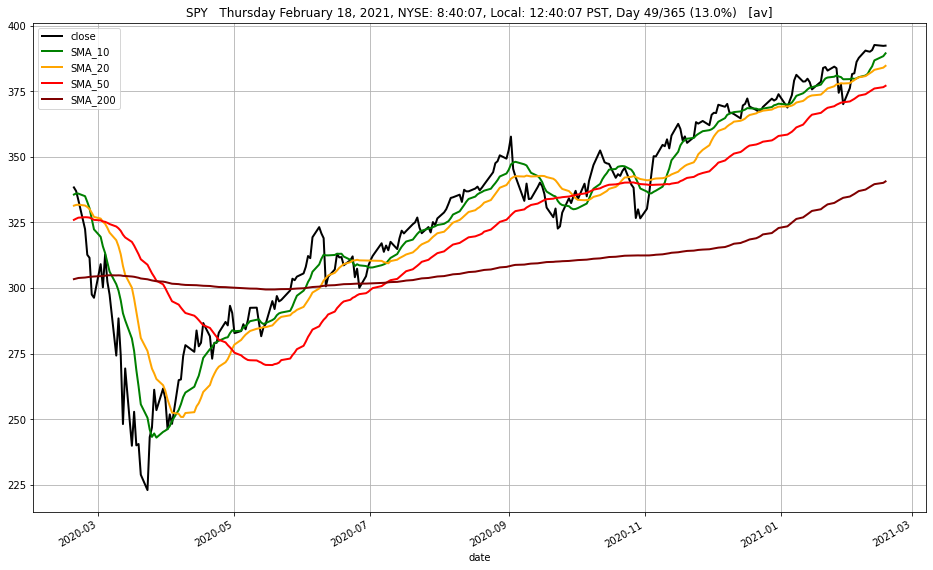

In [14]:
watch.load("SPY", plot=True, mas=True)

## Easy to swap Strategies and run them

### Running Simple Strategy A

In [15]:
# Load custom_a into Watchlist and verify
watch.strategy = custom_a
# watch.debug = True
watch.strategy

Strategy(name='A', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}], description='TA Description', created='02/18/2021, 12:39:47')

In [16]:
watch.load("IWM")

[i] Loaded IWM[D]: IWM_D.csv


,open,high,low,close,volume,SMA_50,SMA_200
date,,,,,,,
2000-05-26,91.06,91.440,90.630,91.44,37400.0,NaN,NaN
2000-05-30,92.75,94.810,92.750,94.81,28800.0,NaN,NaN
2000-05-31,95.13,96.380,95.130,95.75,18000.0,NaN,NaN
2000-06-01,97.11,97.310,97.110,97.31,3500.0,NaN,NaN
2000-06-02,101.70,102.400,101.700,102.40,14700.0,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-10,229.92,230.315,224.945,226.88,27682789.0,202.9438,163.56290
2021-02-11,228.14,229.000,223.420,226.62,25847586.0,203.8558,164.05045
2021-02-12,225.93,227.740,224.640,227.26,17440191.0,204.7470,164.50945


### Running Simple Strategy B

In [17]:
# Load custom_b into Watchlist and verify
watch.strategy = custom_b
watch.strategy

Strategy(name='B', ta=[{'kind': 'ema', 'length': 8}, {'kind': 'ema', 'length': 21}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'rsi'}, {'kind': 'supertrend'}], description='TA Description', created='02/18/2021, 12:39:47')

In [18]:
watch.load("SPY")

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,EMA_8,EMA_21,CUMLOGRET_1,RSI_14,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
date,,,,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,0.000000,1,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,-0.007172,NaN,NaN,1,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,-0.000461,NaN,NaN,1,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,0.007120,NaN,NaN,1,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,0.016915,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,392.1200,392.2800,387.5000,390.0800,58362935.0,386.458726,381.977892,1.056919,64.004906,376.872227,1,376.872227,NaN
2021-02-11,391.2400,391.6900,388.1000,390.7100,42913288.0,387.403454,382.771720,1.058533,64.646206,376.933575,1,376.933575,NaN
2021-02-12,389.8500,392.9000,389.7700,392.6400,50593270.0,388.567131,383.668836,1.063460,66.608891,378.883779,1,378.883779,NaN


### Running Bad Strategy. (Misspelled indicator)

In [19]:
# Load custom_run_failure into Watchlist and verify
watch.strategy = custom_run_failure
watch.strategy

Strategy(name='Runtime Failure', ta=[{'kind': 'percet_return'}], description='TA Description', created='02/18/2021, 12:39:47')

In [20]:
try:
    iwm = watch.load("IWM")
except AttributeError as error:
    print(f"[X] Oops! {error}")

[i] Loaded IWM[D]: IWM_D.csv
[X] Oops! 'AnalysisIndicators' object has no attribute 'percet_return'


# Indicator Composition/Chaining
- When you need an indicator to depend on the value of a prior indicator
- Utilitze _prefix_ or _suffix_ to help identify unique columns or avoid column name clashes.

### Volume MAs and MA chains

In [21]:
# Set EMA's and SMA's 'close' to 'volume' to create Volume MAs, prefix 'volume' MAs with 'VOLUME' so easy to identify the column
# Take a price EMA and apply LINREG from EMA's output
volmas_price_ma_chain = [
    {"kind":"ema", "close": "volume", "length": 10, "prefix": "VOLUME"},
    {"kind":"sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    {"kind":"ema", "length": 5},
    {"kind":"linreg", "close": "EMA_5", "length": 8, "prefix": "EMA_5"},
]
vp_ma_chain_ta = ta.Strategy("Volume MAs and Price MA chain", volmas_price_ma_chain)
vp_ma_chain_ta

Strategy(name='Volume MAs and Price MA chain', ta=[{'kind': 'ema', 'close': 'volume', 'length': 10, 'prefix': 'VOLUME'}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOLUME'}, {'kind': 'ema', 'length': 5}, {'kind': 'linreg', 'close': 'EMA_5', 'length': 8, 'prefix': 'EMA_5'}], description='TA Description', created='02/18/2021, 12:39:47')

In [22]:
# Update the Watchlist
watch.strategy = vp_ma_chain_ta
watch.strategy.name

'Volume MAs and Price MA chain'

In [23]:
spy = watch.load("SPY")
spy

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,VOLUME_EMA_10,VOLUME_SMA_20,EMA_5,EMA_5_LR_8
date,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,136.012480,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-10,392.1200,392.2800,387.5000,390.0800,58362935.0,5.624199e+07,64542395.00,388.270305,387.091354
2021-02-11,391.2400,391.6900,388.1000,390.7100,42913288.0,5.381859e+07,64422878.45,389.083537,388.372609
2021-02-12,389.8500,392.9000,389.7700,392.6400,50593270.0,5.323217e+07,64453086.30,390.269025,389.537374


### MACD BBANDS

In [24]:
# MACD is the initial indicator that BBANDS depends on.
# Set BBANDS's 'close' to MACD's main signal, in this case 'MACD_12_26_9' and add a prefix (or suffix) so it's easier to identify
macd_bands_ta = [
    {"kind":"macd"},
    {"kind":"bbands", "close": "MACD_12_26_9", "length": 20, "prefix": "MACD"}
]
macd_bands_ta = ta.Strategy("MACD BBands", macd_bands_ta, f"BBANDS_{macd_bands_ta[1]['length']} applied to MACD")
macd_bands_ta

Strategy(name='MACD BBands', ta=[{'kind': 'macd'}, {'kind': 'bbands', 'close': 'MACD_12_26_9', 'length': 20, 'prefix': 'MACD'}], description='BBANDS_20 applied to MACD', created='02/18/2021, 12:39:47')

In [25]:
# Update the Watchlist
watch.strategy = macd_bands_ta
watch.strategy.name

'MACD BBands'

In [26]:
spy = watch.load("SPY")
spy

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_BBL_20_2.0,MACD_BBM_20_2.0,MACD_BBU_20_2.0,MACD_BBB_20_2.0
date,,,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,392.1200,392.2800,387.5000,390.0800,58362935.0,4.115955,0.768432,3.347522,1.736965,3.487625,5.238285,100.392662
2021-02-11,391.2400,391.6900,388.1000,390.7100,42913288.0,4.287627,0.752083,3.535543,1.736337,3.488320,5.240302,100.448534
2021-02-12,389.8500,392.9000,389.7700,392.6400,50593270.0,4.527226,0.793346,3.733880,1.718321,3.505669,5.293017,101.969021


# Comprehensive Strategy

### MACD and RSI Momentum with BBANDS and SMAs and Cumulative Log Returns

In [27]:
momo_bands_sma_ta = [
    {"kind":"sma", "length": 50},
    {"kind":"sma", "length": 200},
    {"kind":"bbands", "length": 20},
    {"kind":"macd"},
    {"kind":"rsi"},
    {"kind":"log_return", "cumulative": True},
    {"kind":"sma", "close": "CUMLOGRET_1", "length": 5, "suffix": "CUMLOGRET"},
]
momo_bands_sma_strategy = ta.Strategy(
    "Momo, Bands and SMAs and Cumulative Log Returns", # name
    momo_bands_sma_ta, # ta
    "MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns" # description
)
momo_bands_sma_strategy

Strategy(name='Momo, Bands and SMAs and Cumulative Log Returns', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'bbands', 'length': 20}, {'kind': 'macd'}, {'kind': 'rsi'}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'sma', 'close': 'CUMLOGRET_1', 'length': 5, 'suffix': 'CUMLOGRET'}], description='MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns', created='02/18/2021, 12:39:47')

In [28]:
# Update the Watchlist
watch.strategy = momo_bands_sma_strategy
watch.strategy.name

'Momo, Bands and SMAs and Cumulative Log Returns'

In [29]:
spy = watch.load("SPY")
# Apply constants to the DataFrame for indicators
spy.ta.constants(True, [0, 30, 70])
spy.tail()

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,CUMLOGRET_1,SMA_5_CUMLOGRET,0,30,70
date,,,,,,,,,,,,,,,,,,,,
2021-02-10,392.12,392.28,387.50,390.08,58362935.0,374.9464,338.55695,370.722001,381.9135,393.104999,5.860751,4.115955,0.768432,3.347522,64.004906,1.056919,1.054003,0,30,70
2021-02-11,391.24,391.69,388.10,390.71,42913288.0,375.5194,339.08185,370.655462,382.4595,394.263538,6.172699,4.287627,0.752083,3.535543,64.646206,1.058533,1.056330,0,30,70
2021-02-12,389.85,392.90,389.77,392.64,50593270.0,376.0518,339.57900,370.691695,383.1685,395.645305,6.512438,4.527226,0.793346,3.733880,66.608891,1.063460,1.058858,0,30,70
2021-02-16,393.96,394.17,391.53,392.30,50972366.0,376.5620,340.08810,371.405574,383.9985,396.591426,6.558841,4.636231,0.721881,3.914350,65.914662,1.062594,1.059772,0,30,70
2021-02-17,390.42,392.66,389.33,392.39,51746878.0,377.0760,340.63610,371.824830,384.6855,397.546170,6.686329,4.675979,0.609303,4.066676,66.015633,1.062823,1.060866,0,30,70


# Additional Strategy Options

The ```params``` keyword takes a _tuple_ as a shorthand to the parameter arguments in order.
* **Note**: If the indicator arguments change, so will results. Breaking Changes will **always** be posted on the README.

The ```col_numbers``` keyword takes a _tuple_ specifying which column to return if the result is a DataFrame.

In [30]:
params_ta = [
    {"kind":"ema", "params": (10,)},
    # params sets MACD's keyword arguments: fast=9, slow=19, signal=10
    # and returning the 2nd column: histogram
    {"kind":"macd", "params": (9, 19, 10), "col_numbers": (1,)},
    # Selects the Lower and Upper Bands and renames them LB and UB, ignoring the MB
    {"kind":"bbands", "col_numbers": (0,2), "col_names": ("LB", "UB")},
    {"kind":"log_return", "params": (5, False)},
]
params_ta_strategy = ta.Strategy(
    "EMA, MACD History, Outter BBands, Log Returns", # name
    params_ta, # ta
    "EMA, MACD History, BBands(LB, UB), and Log Returns Strategy" # description
)
params_ta_strategy

Strategy(name='EMA, MACD History, Outter BBands, Log Returns', ta=[{'kind': 'ema', 'params': (10,)}, {'kind': 'macd', 'params': (9, 19, 10), 'col_numbers': (1,)}, {'kind': 'bbands', 'col_numbers': (0, 2), 'col_names': ('LB', 'UB')}, {'kind': 'log_return', 'params': (5, False)}], description='EMA, MACD History, BBands(LB, UB), and Log Returns Strategy', created='02/18/2021, 12:39:47')

In [31]:
# Update the Watchlist
watch.strategy = params_ta_strategy
watch.strategy.name

'EMA, MACD History, Outter BBands, Log Returns'

In [32]:
spy = watch.load("SPY")
spy.tail()

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,EMA_10,MACDh_9_19_10,LB,UB,LOGRET_5
date,,,,,,,,,,
2021-02-10,392.12,392.28,387.50,390.08,58362935.0,385.522649,1.022084,385.132809,392.763191,0.021324
2021-02-11,391.24,391.69,388.10,390.71,42913288.0,386.465804,0.943560,387.409116,392.294884,0.011636
2021-02-12,389.85,392.90,389.77,392.64,50593270.0,387.588385,0.948892,388.766411,392.909589,0.012636
2021-02-16,393.96,394.17,391.53,392.30,50972366.0,388.445042,0.814088,388.812616,393.579384,0.004573
2021-02-17,390.42,392.66,389.33,392.39,51746878.0,389.162307,0.638021,389.322844,393.925156,0.005469
